# Business Understanding

What determines a house price?

Our project aims to provide a consultation for real estate angencies that help homeowners sell homes. We will develop a pricing algorithm to help set a price for a home by predicting home prices. 

First, our pricing model will show the relationships between the attributes of a house and its price. Then, we address the key attributes that determine the house price. 


This project uses the King County House Sales dataset, which contains 21597 home sales records in 2014-2015, including attributes of houses as well as their prices. 


### Loading the Data


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats  
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from sklearn.metrics import mean_squared_error, r2_score , make_scorer
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.dummy import DummyRegressor

In [66]:
data = pd.read_csv("data/kc_house_data.csv",index_col='id')

# Data Understanding

In [67]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [68]:
#suggestion for the project to save time
irrelevant_columns = ['date',
'view',
'sqft_above',
'sqft_basement',
'yr_renovated',
'lat',
'long',
'sqft_living15',
'sqft_lot15']

In [69]:
df=data.drop(irrelevant_columns, axis=1).copy()

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
 10  zipcode      21597 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 2.0 MB


In [71]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676,98077.951845
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234,53.513072
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,98001.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000,98199.000000


In [72]:
df.isna().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
zipcode           0
dtype: int64

In [73]:
for col in df.columns:
    try:
        print(col, df[col].value_counts())
    except:
        print(col, df[col].value_counts())   
    print('\n')

price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
285750.0      1
162950.0      1
612995.0      1
255544.0      1
897000.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75       1
7.50       1
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1010    129
1660    129
       ... 
2678      1
6900      1
6980      1
3078      1
2031      1
Name: sqft_living, Length: 1034, dtype: i

In [74]:
print('bathrooms', sorted(set(df['bathrooms'])))

bathrooms [0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.5, 7.75, 8.0]


In [75]:
print('bedrooms', set(df['bedrooms']))

bedrooms {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33}


In [76]:
#typo or outlier, need to drop 
df.loc[df['bedrooms']==33,['bathrooms']]

,bathrooms
id,
2402100895,1.75


In [77]:
df=df.drop(df[df['bedrooms']==33].index).copy()

In [78]:
for col in df.columns:
    try:
        print(col, df[col].nunique())
    except:
        print(col, df[col].nunique())   
    print('\n')

price 3622


bedrooms 11


bathrooms 29


sqft_living 1034


sqft_lot 9776


floors 6


waterfront 2


condition 5


grade 11


yr_built 116


zipcode 70




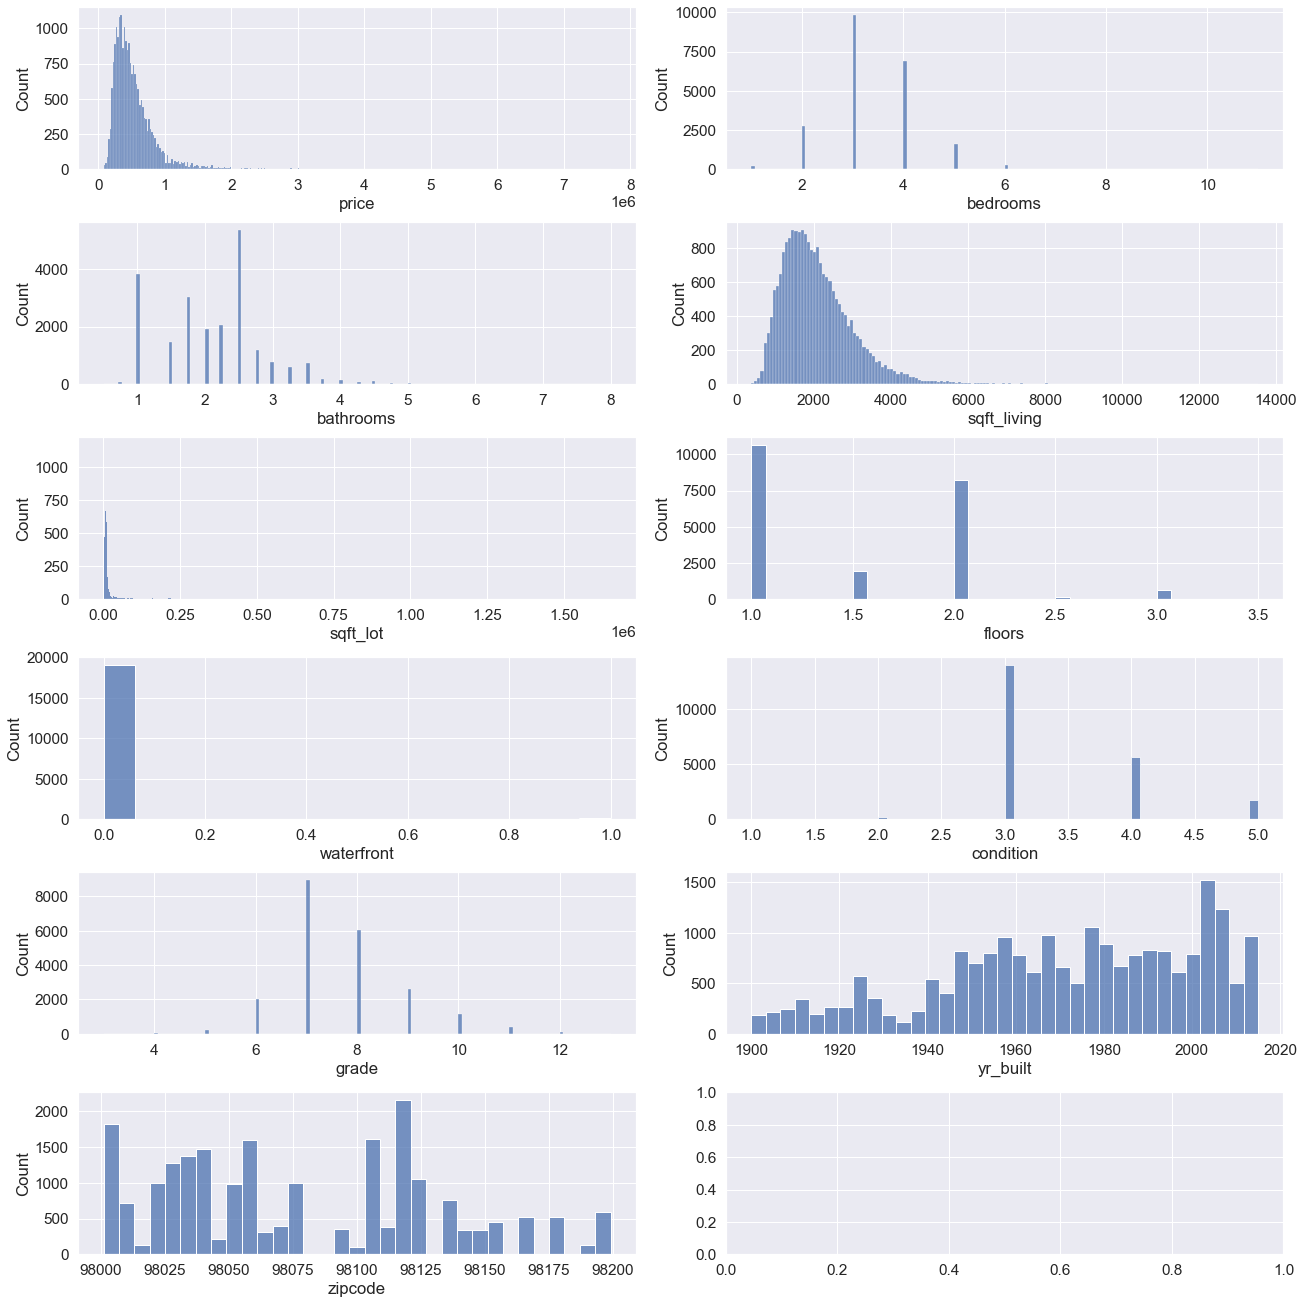

In [79]:
f, axes = plt.subplots(nrows=6, ncols=2, figsize=(18,18) ,constrained_layout=True)

for axx, column in zip(axes.flatten(), df.columns):
    sns.histplot(x=df[column], data=df,ax=axx)
   

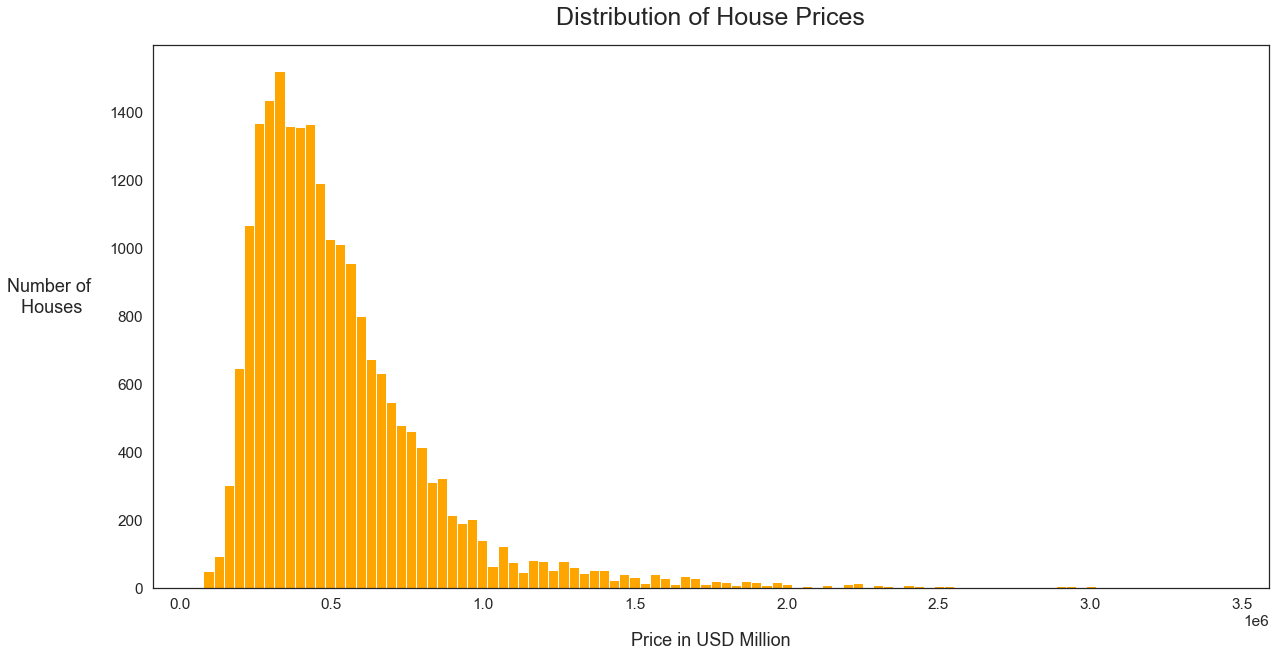

In [80]:
price_plot = data.loc[data['price']<3500000]
sns.set_style("white")
fig, ax = plt.subplots(figsize=(20, 10))

ax.hist(price_plot['price'], bins=100, color='orange')

ax.set_xlabel("Price in USD Million", fontsize=18, labelpad=20)
ax.set_ylabel("Number of\n Houses", fontsize=18, labelpad=60, rotation=0)
ax.set_title("Distribution of House Prices", fontsize=25, pad=20);

In [81]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df['price'].quantile(q=q)))

0.9 percentile: 887000.0
0.91 percentile: 919994.5
0.92 percentile: 950000.0
0.93 percentile: 997967.5000000001
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0


In [82]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df['sqft_living'].quantile(q=q)))

0.9 percentile: 3255.0
0.91 percentile: 3340.0
0.92 percentile: 3420.0
0.93 percentile: 3510.0
0.94 percentile: 3630.0
0.95 percentile: 3760.0
0.96 percentile: 3920.0
0.97 percentile: 4140.0
0.98 percentile: 4410.0


In [83]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df['sqft_lot'].quantile(q=q)))

0.9 percentile: 21372.0
0.91 percentile: 24151.70000000002
0.92 percentile: 28506.400000000023
0.93 percentile: 34848.0
0.94 percentile: 37643.5
0.95 percentile: 43308.75
0.96 percentile: 50655.600000000006
0.97 percentile: 67384.89999999976
0.98 percentile: 107157.0


In [84]:
stats.kurtosis(df.sqft_living)

5.250278624437211

In [85]:
stats.skew(df.sqft_living)

1.4730409364724821

In [86]:
stats.skew(df.sqft_lot)

13.071406775919803

A high positive skewness is observed as there are more values on the left side of the 
distribution mean than those on right side, longer tail to the right side 

In [87]:
stats.kurtosis(df.sqft_lot)

285.4168446506654

kurtosis higher than 3 indicates heavier tails than a normal distribution

In [88]:
#will need to log transform later
loglot= np.log(df.sqft_lot)

In [89]:
stats.kurtosis(loglot)

3.3286839377382753

In [90]:
stats.skew(loglot)

0.9623750156615982

In [91]:
#better without log transfomation 
logliv= np.log(df.sqft_living)

In [92]:
stats.kurtosis(logliv)

-0.0793932778715023

In [93]:
stats.skew(logliv)

-0.027409771717033345

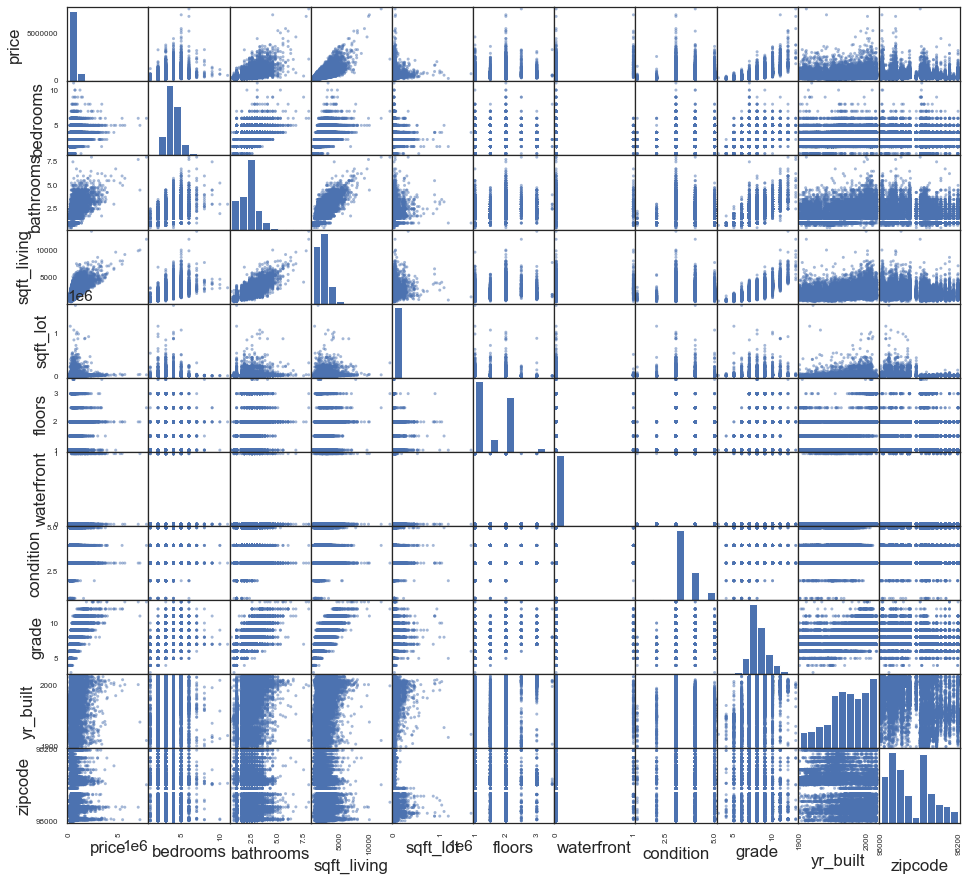

In [94]:
pd.plotting.scatter_matrix(df,figsize  = [16, 15]);

<AxesSubplot:>

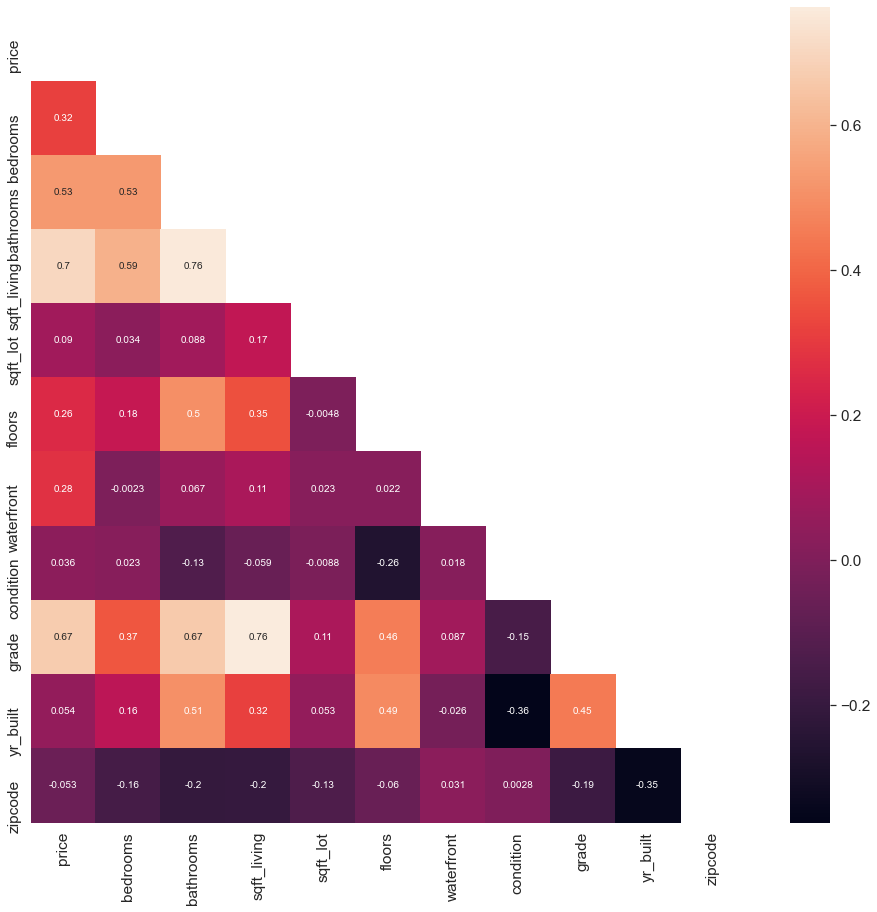

In [95]:
#checking for correlation and considering multicollinearity 
corr= df.corr()
fig, axes = plt.subplots( figsize=(16,15))

sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype = bool)), annot=True)

Based on the plot above, 'sqft_living' is most strongly correlated with the target (`price`).

In [96]:
print(abs(corr) > 0.60)

             price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price         True     False      False         True     False   False   
bedrooms     False      True      False        False     False   False   
bathrooms    False     False       True         True     False   False   
sqft_living   True     False       True         True     False   False   
sqft_lot     False     False      False        False      True   False   
floors       False     False      False        False     False    True   
waterfront   False     False      False        False     False   False   
condition    False     False      False        False     False   False   
grade         True     False       True         True     False   False   
yr_built     False     False      False        False     False   False   
zipcode      False     False      False        False     False   False   

             waterfront  condition  grade  yr_built  zipcode  
price             False      False   True     Fa

> Note
> - price and sqft_living and grade
> - bathrooms  and sqft_living and grade  


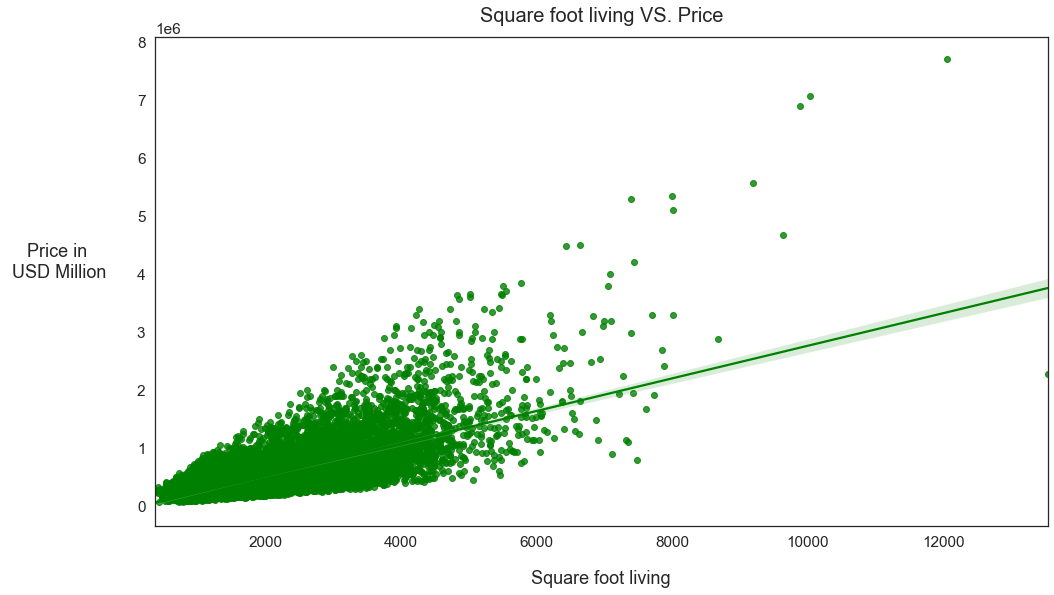

In [97]:
sns.set_style("white")
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
sns.set(font_scale=1.4)

sns.regplot( 
        x=df['sqft_living'],
        y=df['price'],
        ci=99,
        color='green')

ax.set_xlabel("Square foot living", fontsize=18, labelpad=20)
ax.set_ylabel("Price in\n USD Million", fontsize=18, labelpad=80, rotation=0)
ax.set_title("Square foot living VS. Price", fontsize=20, pad=15);

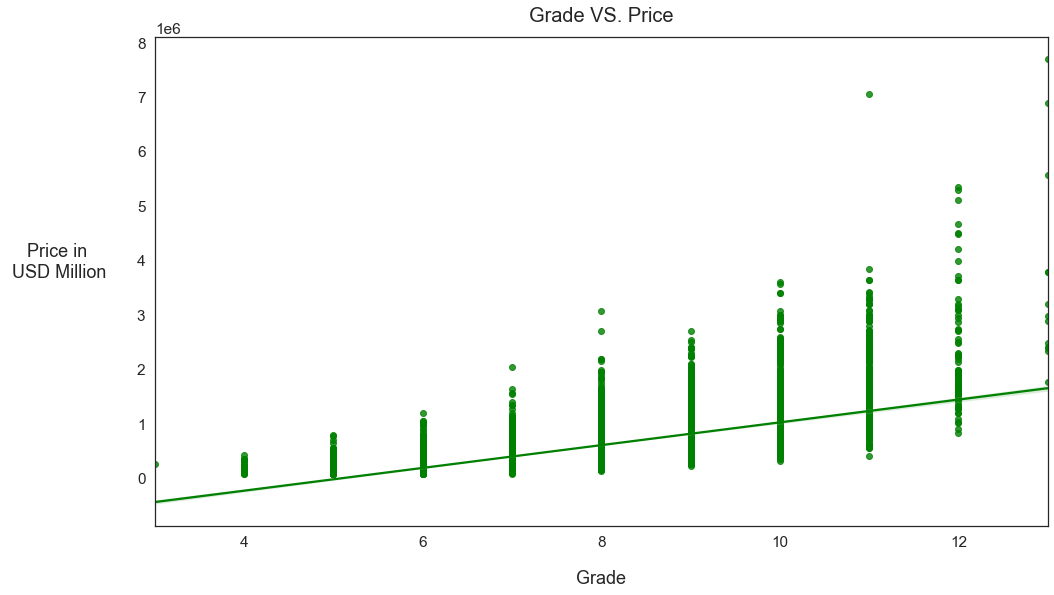

In [98]:
sns.set_style("white")
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
sns.set(font_scale=1.4)

sns.regplot( 
        x=df['grade'],
        y=df['price'],
        ci=99,
        color='green'
    )

ax.set_xlabel("Grade", fontsize=18, labelpad=20)
ax.set_ylabel("Price in\n USD Million", fontsize=18, labelpad=80, rotation=0)
ax.set_title("Grade VS. Price", fontsize=20, pad=15);

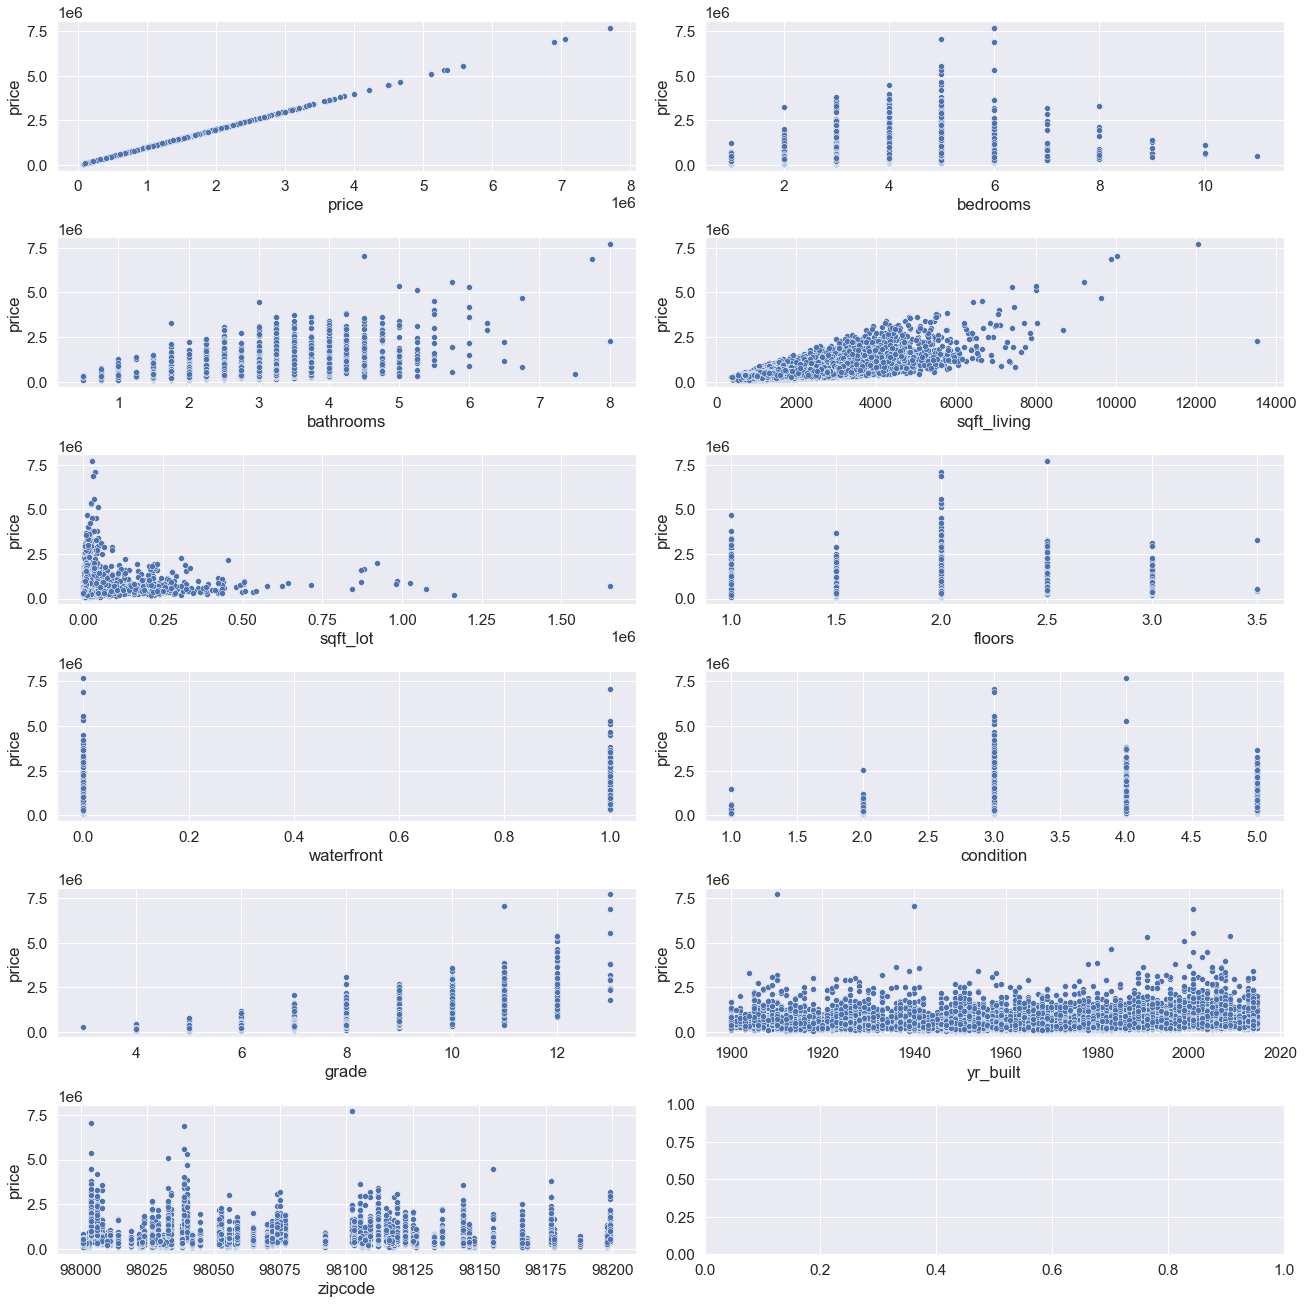

In [99]:
#checking for linear relationship with price 
#sqrt_living with the highest correlation coefficient looks the most linear
f, axes = plt.subplots(nrows=6, ncols=2, figsize=(18,18) ,constrained_layout=True)
for axx, column in zip(axes.flatten(), df.columns):
    sns.scatterplot(x=df[column], y= df['price'], data=df,ax=axx) 

excluding condition since it doesn't have a clear correlation with price 

# Data Preparation

In [100]:
df.waterfront.fillna(value=0, inplace = True)

In [101]:
df.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
zipcode        0
dtype: int64

In [102]:
zipcode = [98101,98102,98103,98104,98105,98106,98107,98108,98109,98111,98112,98114,98115,98116,98117,98118,98119,98121,98122,98124,98125,98126,98131,98132,98133,98134,98136,98138,98144,98145,98146,98148,98154,98155,98158,98160,98161,98164,98166,98168,98171,98174,98177,98178,98188,98198,98199]

In [103]:
df['seattle'] = df['zipcode'].map(lambda x: 1 if x in zipcode else 0)

In [104]:
df['seattle'].value_counts()

0    12624
1     8972
Name: seattle, dtype: int64

In [105]:
x=df.drop('price', axis=1).copy()
y=df['price']

In [106]:
#Binning yr_built
bins = [1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels = [1,2,3,4,5,6]
x['yr_built_binned'] = pd.cut(x['yr_built'], bins,labels=labels, include_lowest = True)

In [107]:
x['yr_built_binned'].isna().sum()

0

In [108]:
set(x['yr_built_binned'])

{1, 2, 3, 4, 5, 6}

In [109]:
#spliting data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=75)

In [110]:
x_train.isna().sum()

bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
condition          0
grade              0
yr_built           0
zipcode            0
seattle            0
yr_built_binned    0
dtype: int64

In [111]:
#pd.set_option("display.max_rows", 66, "display.max_columns", 66)
train= pd.concat([x_train, y_train], axis =1)
corr= train.corr()
df=corr.abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)
df[abs(df['cc'] > 0.6)]

,cc
pairs,
"(bedrooms, bedrooms)",1.000000
"(seattle, zipcode)",0.877671
"(sqft_living, grade)",0.761402
"(sqft_living, bathrooms)",0.756021
"(sqft_living, price)",0.698616
"(bathrooms, grade)",0.667317
"(grade, price)",0.664722


In [112]:
#testing for VIF
vif = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
pd.Series(vif, index=x_train.columns, name="Variance Inflation Factor")            

bedrooms               25.271008
bathrooms              27.683538
sqft_living            26.090209
sqft_lot                1.200423
floors                 14.411413
waterfront              1.028757
condition              34.020972
grade                 127.239902
yr_built           129207.710941
zipcode            119271.296606
seattle                 2.672749
yr_built_binned       231.407567
Name: Variance Inflation Factor, dtype: float64

dropping bathrooms to eliminate multicollinearity since it is correlated with sqft_living and grade when those two are correlated with price, bathroom also has a high VIF

In [113]:
#seperating two types of predictors 
categorical=['bedrooms','floors','waterfront', 'grade', 'zipcode']
con = ['sqft_living','sqft_lot']

In [114]:
#creating dummie variables for categorical data
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe.fit(x_train[categorical])
dummies_encoded_train_all = ohe.transform(x_train[categorical])
dummies_encoded_train_all = pd.DataFrame(dummies_encoded_train_all, columns=ohe.get_feature_names(categorical), index=x_train.index)


In [115]:
#transforming test dummies
dummies_encoded_test_all= ohe.transform(x_test[categorical])
dummies_encoded_test_all = pd.DataFrame(dummies_encoded_test_all, columns=ohe.get_feature_names(categorical),index=x_test.index )

In [116]:
#x_test['log_sqft_lot']= np.log(x_test['sqft_lot'])
#x_train['log_sqft_lot']= np.log(x_train['sqft_lot'])


<ipython-input-116-4b22c8ae8862>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['log_sqft_lot']= np.log(x_test['sqft_lot'])
<ipython-input-116-4b22c8ae8862>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['log_sqft_lot']= np.log(x_train['sqft_lot'])


In [181]:
x_train_final = pd.concat([x_train[['sqft_living','log_sqft_lot']],dummies_encoded_train_all], axis=1)
x_train_final.columns=[x.replace('.','_') for x in x_train_final.columns]

In [182]:
x_test_final = pd.concat([x_test[['sqft_living','log_sqft_lot']],dummies_encoded_test_all], axis=1)
x_test_final.columns=[x.replace('.','_') for x in x_test_final.columns]

In [119]:
train_final= pd.concat([x_train_final,y_train], axis=1)

# Data Modeling

In [120]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(x_train, y_train)
DummyRegressor()
dummy_regr.predict(x_train)
dummy_regr.score(x_train, y_train)

0.0

## Baseline Model sqft_living vs price

In [121]:
baseline_model = LinearRegression()
baseline_model.fit(x_train[['sqft_living']], y_train)
baseline_model.score(x_train[['sqft_living']], y_train)


0.4880645374199807

In [122]:
baseline_model.score(x_test[['sqft_living']], y_test)

0.5116624366066751

In [123]:
#root mean squared error
train_mse= mean_squared_error(y_train, baseline_model.predict(x_train[['sqft_living']]), squared=False)
test_mse= mean_squared_error(y_test, baseline_model.predict(x_test[['sqft_living']]), squared=False)

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 263517.83595589775
Test Mean Squarred Error: 254082.36364077116


In [124]:
cross_val_score(baseline_model, x[['sqft_living']],y, cv=5).mean()

0.49095151374433116

In [125]:
#splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

model = LinearRegression()
x_train_model = x_train[['sqft_living']]

baseline_model_scores = cross_validate(
    estimator=model,
    X=x_train_model,
    y=y_train,
    return_train_score=True,
    cv=5
)

print("Current Model")
print("Train score:     ", baseline_model_scores["train_score"].mean())
print("Validation score:", baseline_model_scores["test_score"].mean())

Current Model
Train score:      0.48811661967576736
Validation score: 0.48650357109713643


In [126]:
r2_score(y, baseline_model.predict(x[['sqft_living']]))

0.49269952899115266

mse = make_scorer(mean_squared_error, squared=False)
cross_val_score(baseline_model, x_train[['sqft_living']],y_train, cv=5, scoring=mse).mean()

In [127]:
#overfitting if large difference between to test and train mse 
abs(train_mse-test_mse)/train_mse

0.035805820432988494

In [128]:
y_hat_train = baseline_model.predict(x_train[['sqft_living']])
y_hat_test = baseline_model.predict(x_test[['sqft_living']])
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

print('Average Train Residuals/Bias:', train_residuals.mean())
print('Average Test Residuals/Bias:', test_residuals.mean())

Average Train Residuals/Bias: -2.319243076509915e-11
Average Test Residuals/Bias: -3533.7889243886752


In [129]:
var_train = np.var(y_hat_train) 
var_test = np.var(y_hat_test) 
print('Train Prediciton Variance:', var_train)
print('Test Prediciton Variance:', var_test)

Train Prediciton Variance: 66203670574.318184
Test Prediciton Variance: 66746174319.378456


In [130]:
#check if i get the same result with a different model 
outcome = 'price'
predictors ='sqft_living'
formula = outcome + '~' + predictors
model2 = ols(formula=formula, data=train_final).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                 1.647e+04
Date:                Wed, 14 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:07:14   Log-Likelihood:            -2.4015e+05
No. Observations:               17276   AIC:                         4.803e+05
Df Residuals:                   17274   BIC:                         4.803e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.392e+04   4968.276     -8.839      0.000   -5.37e+04   -3.42e+04
sqft_living   280.4830      2.186    128.330      0.000     276.199     284.767
==============================================================================
Omnibus:                    12487.387   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           539600.256
Skew:                           2.998   Prob(JB):                         0.00
Kurtosis:                      29.714   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

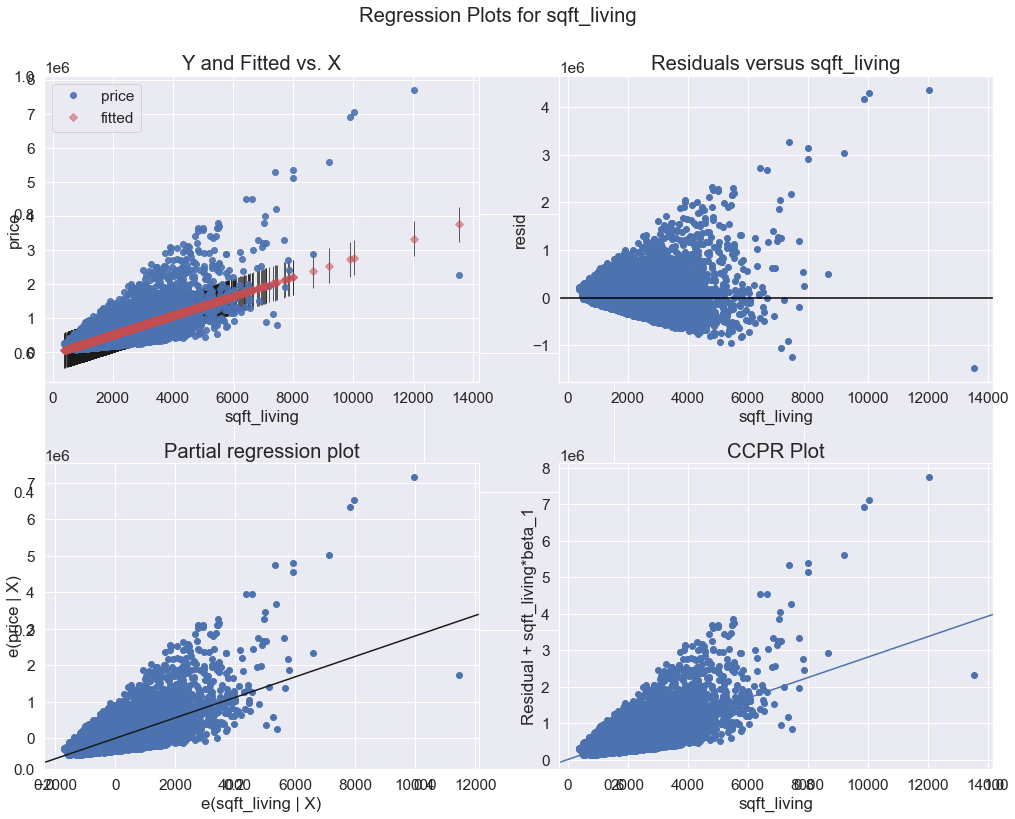

In [131]:
fig, axes = plt.subplots(figsize=(15,12))
fig = sm.graphics.plot_regress_exog(model2, 'sqft_living', fig=fig)

In [132]:
residuals = model2.resid

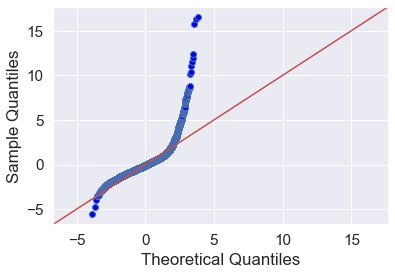

In [133]:
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

Our outliers are causing problems. This
is bad enough that we can probably say that we
are violating the normality assumption

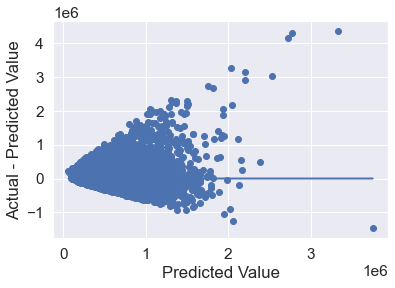

In [134]:
fig, ax = plt.subplots()

preds1 = model2.predict(train_final['sqft_living'])
preds1
ax.scatter(preds1 , model2.resid)
ax.plot(preds1, [0 for i in range(len(train_final))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

heteroscedasticity

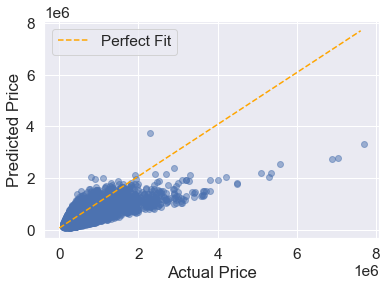

In [135]:
#vertical distance between the points and the line denote the errors
preds = model2.predict(x_train)
fig, ax = plt.subplots()

perfect_line = np.arange(y_train.min(), y_train.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_train, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

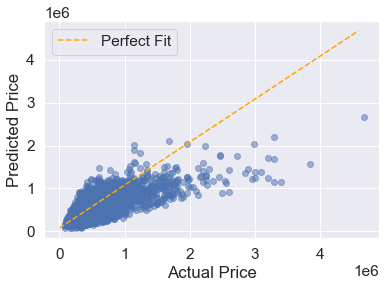

In [136]:
#vertical distance between the points and the line denote the errors
preds = model2.predict(x_test)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

We have some outliers that are all over the
place violating linear relationship

### standardized transformed sqft_living vs price

In [137]:
scaler = StandardScaler()
x_train_sc1 = scaler.fit_transform(x_train[['sqft_living']])
x_test_sc1 = scaler.fit_transform(x_test[['sqft_living']])

In [138]:
linreg1_t = LinearRegression()
linreg1_t.fit(x_train_sc1, y_train)
linreg1_t.score(x_train_sc1, y_train)


0.4880645374199807

standardscaler doesn't seem to make a difference here

### polynomial transformed sqft_living vs price

degree 2 0.5428665308592373
degree 3 0.5438587685749856
degree 4 0.5364410353544797


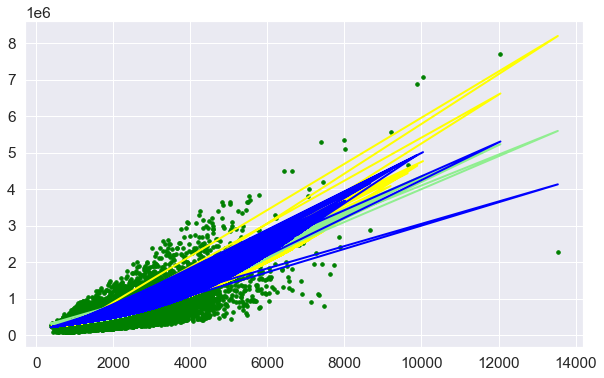

In [139]:
colors = ['yellow', 'lightgreen', 'blue']
plt.figure(figsize=(10, 6))
plt.scatter(x['sqft_living'], y, color='green', s=50, marker='.', label='plot points')

for index, degree in enumerate([2, 3, 4]):
    
    poly = PolynomialFeatures(degree)
    
    x_poly_train = poly.fit_transform(x_train[['sqft_living']])
    
    reg_poly = LinearRegression().fit(x_poly_train, y_train)
    
    x_poly_test = poly.transform(x_test[['sqft_living']])
     
    y_pred = reg_poly.predict(x_poly_test)
    
    print("degree %d" % degree, r2_score(y_test, y_pred))
    
    x_poly = poly.transform(x[['sqft_living']])
     
    y_poly = reg_poly.predict(x_poly)
    
    plt.plot(x['sqft_living'], y_poly, color = colors[index], linewidth=2, label='degree %d' % degree)
    

polynomial seems to improve the model 


## 2. Build the Second Model with Additional Feature (Grade)

We will add in additional feature of the training data, and compare that model's performance to the performance of the baseline model.


### including a categorical variable grade 

In [140]:
linreg2 = LinearRegression()
linreg2.fit(x_train[['sqft_living','grade']], y_train)
linreg2.score(x_train[['sqft_living', 'grade']], y_train)

0.5300240594479888

### standaziing the two independent varaibles 

In [141]:
scaler = StandardScaler()
x_train_sc2 = scaler.fit_transform(x_train[['sqft_living','grade']])


In [142]:
linreg2_t = LinearRegression()
linreg2_t.fit(x_train_sc2, y_train)
linreg2_t.score(x_train_sc2, y_train)

0.5300240594479888

### turning grade into dummies and combining it with standardized sqft_living

In [143]:

ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")
ohe.fit(x_train[['grade']])
dummies_encoded_train = ohe.transform(x_train[['grade']])
dummies_encoded_test = ohe.transform(x_test[['grade']])
dummies_encoded_train = pd.DataFrame(dummies_encoded_train, columns = ohe.get_feature_names(['grade']), index=x_train.index)
dummies_encoded_test = pd.DataFrame(dummies_encoded_test, columns = ohe.get_feature_names(['grade']), index=x_test.index)


In [144]:
x_train_living = pd.DataFrame(x_train_sc1, index=x_train.index)
x_test_living = pd.DataFrame(x_test_sc1, index=x_test.index)

In [145]:
x_train2 = pd.concat([x_train_living, dummies_encoded_train], axis=1)
#x_test2 = pd.concat([x_test_living, dummies_encoded_test], axis=1)

In [146]:
linreg2_t = LinearRegression()
linreg2_t.fit(x_train2, y_train)
linreg2_t.score(x_train2, y_train)

0.5810581312041051

### dummies plus polynomial transformation 

In [147]:
poly = PolynomialFeatures(2)
    
x_poly_train = poly.fit_transform(x_train[['sqft_living']])
    
x_poly_test = poly.transform(x_test[['sqft_living']])
     
x_train_poly = pd.DataFrame(x_poly_train, index=x_train.index)
x_test_poly = pd.DataFrame(x_poly_test, index=x_test.index)
    
x_train3 = pd.concat([x_train_poly, dummies_encoded_train], axis=1)
x_test3 = pd.concat([x_test_poly, dummies_encoded_test], axis=1)


reg_poly = LinearRegression().fit(x_train3, y_train)
y_pred = reg_poly.predict(x_test3)
    
print("degree %d" % 2, r2_score(y_test, y_pred))
    

degree 2 0.5997761242996374


### conclusion: dummies and polynomial transformation has more positive effect on the model

## 3. Build and Evaluate a Final Predictive Model

Using the best features selected in the previous step, create a final model, fit it on all rows of the training dataset, and evaluate it on all rows of the test dataset in terms of both r-squared and RMSE.


### Creating the final predictive model with all the independent variables selected 

In [148]:
model_all = LinearRegression()
model_all.fit(x_train_final, y_train)
cross_val_score(model_all,x_train_final, y_train, cv=5)


array([0.82451543, 0.80903122, 0.81470412, 0.82179899, 0.80501777])

In [149]:
cross_val_score(model_all, x ,y, cv=5)

array([0.67065517, 0.65972179, 0.64882526, 0.65711168, 0.66041021])

In [150]:
model_all.score(x_test_final, y_test)

0.8159048110441636

In [152]:
outcome = 'price'
predictors = x_train_final
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model_all2= ols(formula=formula, data=train_final).fit()
model_all2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     823.6
Date:                Wed, 14 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:13:02   Log-Likelihood:            -2.3105e+05
No. Observations:               17276   AIC:                         4.623e+05
Df Residuals:                   17179   BIC:                         4.630e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.419e+05   1.58e+04     21.653      0.000    3.11e+05    3.73e+05
sqft_living      167.5032      2.628     63.740      0.000     162.352     172.654
log_sqft_lot    2.632e+04   1912.863     13.760      0.000    2.26e+04    3.01e+04
bedrooms_1      1.186e+05   2.15e+04      5.510      0.000    7.64e+04    1.61e+05
bedrooms_2      1.241e+05   1.81e+04      6.837      0.000    8.85e+04     1.6e+05
bedrooms_3      1.278e+05   1.78e+04      7.163      0.000    9.28e+04    1.63e+05
bedrooms_4      1.053e+05   1.78e+04      5.910      0.000    7.03e+04     1.4e+05
bedrooms_5      9.352e+04   1.81e+04      5.165      0.000     5.8e+04    1.29e+05
bedrooms_6        9.3e+04   2.01e+04      4.623      0.000    5.36e+04    1.32e+05
bedrooms_7     -1.107e+05   3.36e+04     -3.296      0.001   -1.77e+05   -4.49e+04
bedrooms_8      8.992e+04   4.87e+04      1.847      0.065   -5488.118    1.85e+05
bedrooms_9     -1.963e+05   6.63e+04     -2.961      0.003   -3.26e+05   -6.63e+04
bedrooms_10    -1.816e+05    8.4e+04     -2.162      0.031   -3.46e+05    -1.7e+04
bedrooms_11     7.841e+04   1.43e+05      0.547      0.584   -2.02e+05    3.59e+05
floors_1_0      5.255e+04   1.09e+04      4.810      0.000    3.11e+04     7.4e+04
floors_1_5      6.162e+04   1.12e+04      5.477      0.000    3.96e+04    8.37e+04
floors_2_0      4.593e+04   1.07e+04      4.293      0.000     2.5e+04    6.69e+04
floors_2_5      1.067e+05   1.57e+04      6.790      0.000    7.59e+04    1.38e+05
floors_3_0      6466.9761    1.2e+04      0.537      0.591   -1.72e+04    3.01e+04
floors_3_5       6.86e+04   5.47e+04      1.254      0.210   -3.87e+04    1.76e+05
waterfront_0_0 -2.548e+05   9229.523    -27.604      0.000   -2.73e+05   -2.37e+05
waterfront_1_0  5.967e+05   1.22e+04     49.014      0.000    5.73e+05    6.21e+05
grade_4        -3.148e+05   3.28e+04     -9.611      0.000   -3.79e+05   -2.51e+05
grade_5        -3.466e+05   1.29e+04    -26.874      0.000   -3.72e+05   -3.21e+05
grade_6        -3.486e+05   8140.967    -42.820      0.000   -3.65e+05   -3.33e+05
grade_7        -3.485e+05   7033.086    -49.553      0.000   -3.62e+05   -3.35e+05
grade_8        -3.136e+05   6729.325    -46.608      0.000   -3.27e+05      -3e+05
grade_9        -2.332e+05   7027.278    -33.185      0.000   -2.47e+05   -2.19e+05
grade_10       -1.071e+05   8058.697    -13.296      0.000   -1.23e+05   -9.14e+04
grade_11        1.056e+05   1.07e+04      9.853      0.000    8.46e+04    1.27e+05
grade_12        5.677e+05    1.9e+04     29.844      0.000     5.3e+05    6.05e+05
grade_13        1.681e+06   4.28e+04     39.313      0.000     1.6e+06    1.76e+06
zipcode_98001  -2.089e+05   9167.704    -22.786      0.000   -2.27e+05   -1.91e+05
zipcode_98002   -1.85e+05   1.24e+04    -14.925      0.000   -2.09e+05   -1.61e+05
zipcode_9800

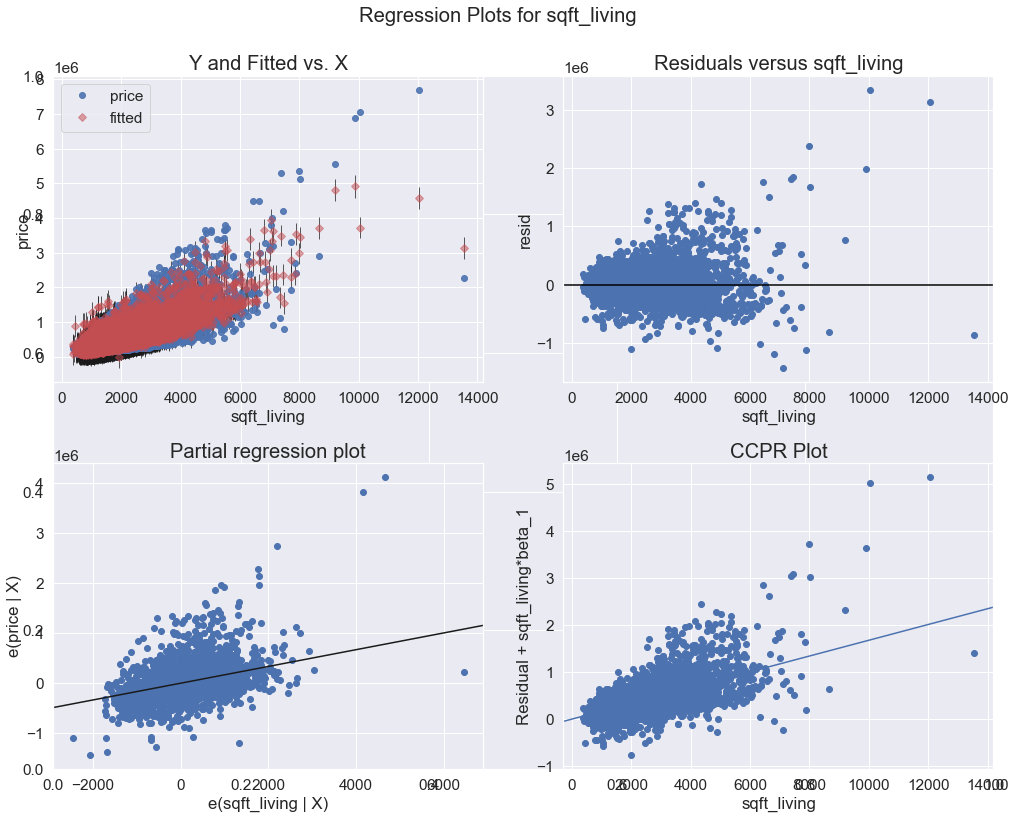

In [153]:
fig, axes = plt.subplots(figsize=(15,12))
fig = sm.graphics.plot_regress_exog(model_all2,'sqft_living', fig=fig)

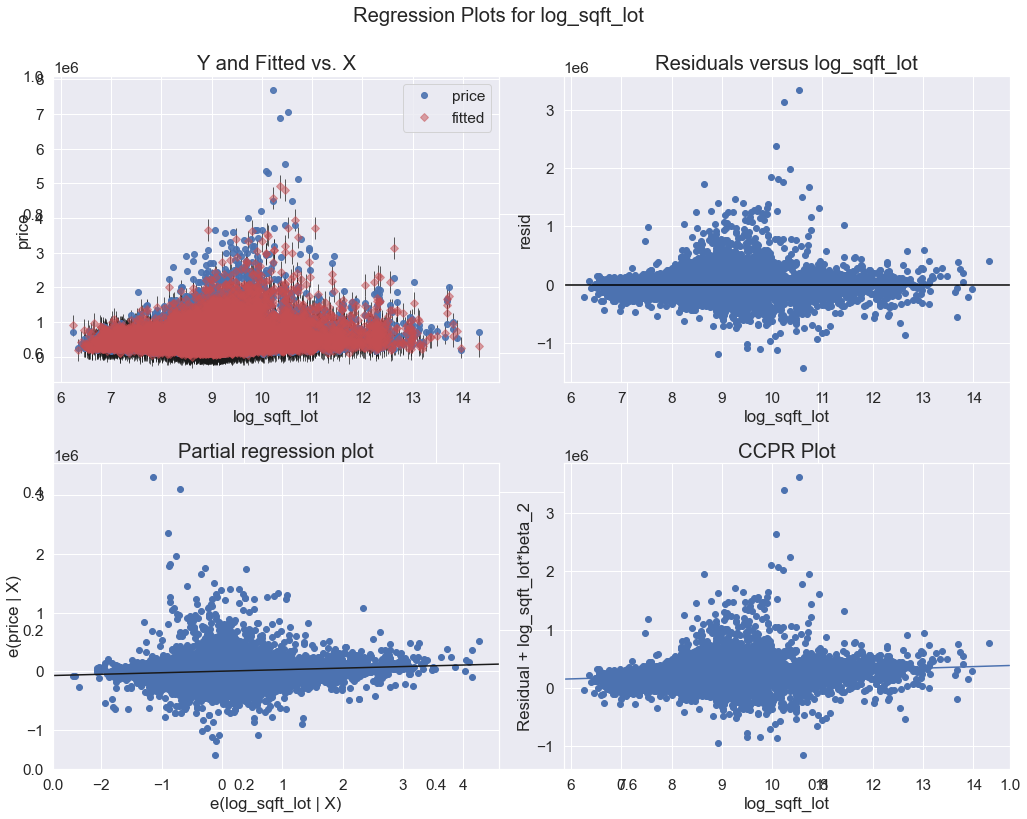

In [154]:
fig, axes = plt.subplots(figsize=(15,12))
fig = sm.graphics.plot_regress_exog(model_all2,'log_sqft_lot', fig=fig)

### selecting only the ones that are statistically significant 

In [157]:
summary = model_all2.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols)

102 93
['sqft_living', 'log_sqft_lot', 'bedrooms_1', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bedrooms_7', 'bedrooms_9', 'bedrooms_10', 'floors_1_0', 'floors_1_5', 'floors_2_0', 'floors_2_5', 'waterfront_0_0', 'waterfront_1_0', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',

In [158]:
outcome = 'price'
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_all3 = ols(formula=formula, data=train_final).fit()
model_all3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     868.8
Date:                Wed, 14 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:16:53   Log-Likelihood:            -2.3105e+05
No. Observations:               17276   AIC:                         4.623e+05
Df Residuals:                   17184   BIC:                         4.630e+05
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.121e+05   3.25e+04     12.684      0.000    3.48e+05    4.76e+05
sqft_living      167.2382      2.622     63.772      0.000     162.098     172.378
log_sqft_lot    2.588e+04   1900.155     13.620      0.000    2.22e+04    2.96e+04
bedrooms_1      2.386e+04   4.93e+04      0.484      0.629   -7.28e+04    1.21e+05
bedrooms_2       2.91e+04   4.76e+04      0.611      0.541   -6.42e+04    1.22e+05
bedrooms_3      3.333e+04   4.75e+04      0.702      0.482   -5.97e+04    1.26e+05
bedrooms_4      1.088e+04   4.74e+04      0.229      0.819    -8.2e+04    1.04e+05
bedrooms_5      -785.8068   4.75e+04     -0.017      0.987   -9.38e+04    9.23e+04
bedrooms_6      -942.1962   4.84e+04     -0.019      0.984   -9.58e+04     9.4e+04
bedrooms_7     -2.045e+05   5.66e+04     -3.612      0.000   -3.16e+05   -9.35e+04
bedrooms_9     -2.902e+05   8.46e+04     -3.431      0.001   -4.56e+05   -1.24e+05
bedrooms_10    -2.757e+05   1.02e+05     -2.709      0.007   -4.75e+05   -7.62e+04
floors_1_0      4.531e+04   8372.368      5.412      0.000    2.89e+04    6.17e+04
floors_1_5      5.453e+04   8936.576      6.102      0.000     3.7e+04     7.2e+04
floors_2_0       3.87e+04   8076.980      4.791      0.000    2.29e+04    5.45e+04
floors_2_5       9.96e+04    1.6e+04      6.220      0.000    6.82e+04    1.31e+05
waterfront_0_0 -2.199e+05   1.68e+04    -13.118      0.000   -2.53e+05   -1.87e+05
waterfront_1_0   6.32e+05   1.88e+04     33.533      0.000    5.95e+05    6.69e+05
grade_4        -3.083e+05   3.29e+04     -9.372      0.000   -3.73e+05   -2.44e+05
grade_5        -3.399e+05   1.32e+04    -25.839      0.000   -3.66e+05   -3.14e+05
grade_6        -3.418e+05   8525.185    -40.099      0.000   -3.59e+05   -3.25e+05
grade_7         -3.42e+05   7465.449    -45.809      0.000   -3.57e+05   -3.27e+05
grade_8        -3.069e+05   7188.218    -42.694      0.000   -3.21e+05   -2.93e+05
grade_9        -2.265e+05   7507.567    -30.166      0.000   -2.41e+05   -2.12e+05
grade_10       -1.004e+05   8524.951    -11.783      0.000   -1.17e+05   -8.37e+04
grade_11        1.125e+05   1.11e+04     10.126      0.000    9.07e+04    1.34e+05
grade_12         5.76e+05   1.92e+04     30.028      0.000    5.38e+05    6.14e+05
grade_13        1.689e+06   4.29e+04     39.349      0.000    1.61e+06    1.77e+06
zipcode_98001  -2.143e+05   1.01e+04    -21.171      0.000   -2.34e+05   -1.94e+05
zipcode_98002  -1.907e+05   1.32e+04    -14.421      0.000   -2.17e+05   -1.65e+05
zipcode_98003    -2.2e+05   1.12e+04    -19.567      0.000   -2.42e+05   -1.98e+05
zipcode_98004   5.708e+05   1.08e+04     52.691      0.000     5.5e+05    5.92e+05
zipcode_98005    8.92e+04   1.39e+04      6.413      0.000    6.19e+04    1.16e+05
zipcode_98006   5.671e+04   9004.770      6.297      0.000    3.91e+04    7.44e+04
zipcode_9800

<AxesSubplot:>

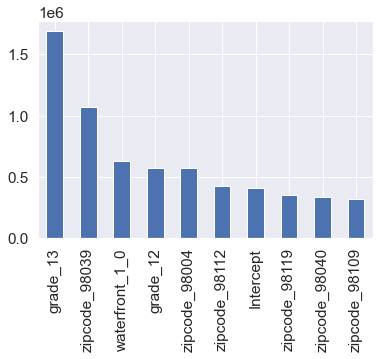

In [161]:
model_coef = model_all3.params.sort_values(ascending=False)

model_largest = model_coef.nlargest(10)

model_largest.plot(kind='bar')

### Removing the insignificant variables did not improve adjusted R-squared

### Applying the feature selection tool 

In [162]:
splitter = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
testmodel = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(testmodel, cv=splitter)
selector.fit(x_train_final,y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(x_train_final.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
sqft_living: True
log_sqft_lot: True
bedrooms_1: True
bedrooms_2: True
bedrooms_3: True
bedrooms_4: True
bedrooms_5: True
bedrooms_6: True
bedrooms_7: True
bedrooms_8: True
bedrooms_9: True
bedrooms_10: True
bedrooms_11: True
floors_1_0: True
floors_1_5: True
floors_2_0: True
floors_2_5: True
floors_3_0: True
floors_3_5: True
waterfront_0_0: True
waterfront_1_0: True
grade_4: True
grade_5: True
grade_6: True
grade_7: True
grade_8: True
grade_9: True
grade_10: True
grade_11: True
grade_12: True
grade_13: True
zipcode_98001: True
zipcode_98002: True
zipcode_98003: True
zipcode_98004: True
zipcode_98005: True
zipcode_98006: True
zipcode_98007: True
zipcode_98008: True
zipcode_98010: True
zipcode_98011: True
zipcode_98014: True
zipcode_98019: True
zipcode_98022: True
zipcode_98023: True
zipcode_98024: True
zipcode_98027: True
zipcode_98028: True
zipcode_98029: True
zipcode_98030: True
zipcode_98031: True
zipcode_98032: True
zipcode_98033: True
zipcode_98034: True
z

In [163]:
#running a regression of the columns selected by feature se
linreg = LinearRegression()
selected_columns = x_train_final.columns[selector.support_]
linreg.fit(x_train_final[selected_columns],y_train)
estimators = selector.estimator_
print(estimators.score(x_train_final[selected_columns],y_train))


0.8215140924874984


In [ ]:
#print(estimators.coef_)
#print(estimators.intercept_)

### Same result 

### Applying Polynomial transformation on the final test data set

In [164]:
poly = PolynomialFeatures(3)

x_poly_train_final = poly.fit_transform(x_train_final[['sqft_living','log_sqft_lot']])
    
x_poly_test_final = poly.transform(x_test_final[['sqft_living','log_sqft_lot']])
     
x_train_poly_final = pd.DataFrame(x_poly_train_final, index=x_train.index)
x_test_poly_final = pd.DataFrame(x_poly_test_final, index=x_test.index)
    
x_train_final_model = pd.concat([x_train_poly_final, dummies_encoded_train_all], axis=1)
x_test_final_model = pd.concat([x_test_poly_final, dummies_encoded_test_all], axis=1)

reg_poly_final = LinearRegression().fit(x_train_final_model, y_train)

y_pred_train = reg_poly_final.predict(x_train_final_model)
y_pred_test = reg_poly_final.predict(x_test_final_model)

print("degree %d" % 3, r2_score(y_train, y_pred_train))
print("degree %d" % 3, r2_score(y_test, y_pred_test))

degree 3 0.8391815664303052
degree 3 0.8264350848235849



## 4. Interpret the Final Model

Determine what, if any, understanding of the underlying relationship between variables can be determined with this model. This means you will need to interpret the model coefficients as well as checking whether the assumptions of linear regression have been met.


In [165]:
r2_score(y_train, reg_poly_final.predict(x_train_final_model))

0.8391815664303052

In [166]:
reg_poly_final.score(x_test_final_model, y_test)

0.8264350848235849

In [180]:
cross_val_score(reg_poly_final, x ,y, cv=5)

array([0.67065517, 0.65972179, 0.64882526, 0.65711168, 0.66041021])

In [167]:
train_mse_final= mean_squared_error(y_train, reg_poly_final.predict(x_train_final_model), squared=False)
test_mse_final= mean_squared_error(y_test, reg_poly_final.predict(x_test_final_model), squared=False)

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 263517.83595589775
Test Mean Squarred Error: 254082.36364077116


In [168]:
#overfitting if large difference between to test and train mse 
abs(train_mse_final-test_mse_final)/train_mse_final

0.02559313077666502

In [169]:
train_residuals_final = y_pred_train - y_train
test_residuals_final = y_pred_test - y_test

print('Average Train Residuals/Bias:', train_residuals.mean())
print('Average Test Residuals/Bias:', test_residuals.mean())

Average Train Residuals/Bias: -2.319243076509915e-11
Average Test Residuals/Bias: -3533.7889243886752


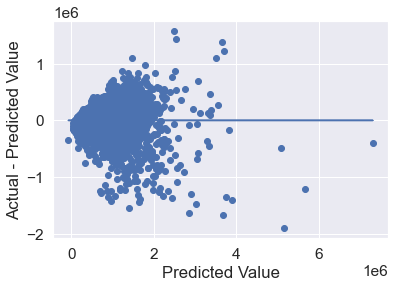

In [170]:
fig, ax = plt.subplots()

ax.scatter(y_pred_train , train_residuals_final)
ax.plot(y_pred_train, [0 for i in range(len(train_final))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

less of a heteroscedasticity

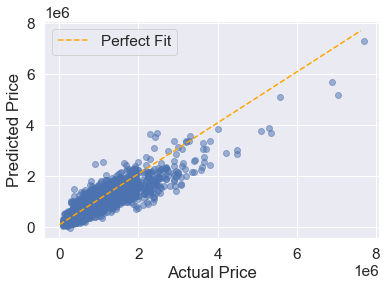

In [171]:
#vertical distance between the points and the line denote the errors

fig, ax = plt.subplots()

perfect_line = np.arange(y_train.min(), y_train.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_train, y_pred_train, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

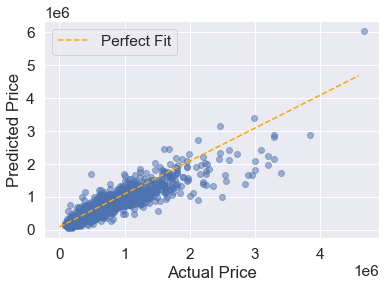

In [172]:
#vertical distance between the points and the line denote the errors
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, y_pred_test, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

In [173]:
var_train = np.var(y_hat_train) 
var_test = np.var(y_hat_test) 
print('Train Prediciton Variance:', var_train)
print('Test Prediciton Variance:', var_test)

Train Prediciton Variance: 66203670574.318184
Test Prediciton Variance: 66746174319.378456


In [174]:
mse = make_scorer(mean_squared_error, squared=False)
cross_val_score(reg_poly_final, x_test_final_model,y_test, cv=5, scoring=mse).mean()

151646.01232763863

In [175]:
cross_val_score(reg_poly_final, x ,y, cv=5)

array([0.67065517, 0.65972179, 0.64882526, 0.65711168, 0.66041021])

In [176]:
cross_val_score(reg_poly_final, x_train_final_model ,y_train, cv=5)

array([0.74575925, 0.83698807, 0.81774751, 0.83867217, 0.8414634 ])

In [177]:
baseline_model_scores = cross_validate(
    estimator=reg_poly_final,
    X=x_test_final_model,
    y=y_test,
    return_train_score=True,
    cv=5
)

print("Current Model")
print("Train score:     ", baseline_model_scores["train_score"].mean())
print("Validation score:", baseline_model_scores["test_score"].mean())

Current Model
Train score:      0.8426960927946341
Validation score: 0.8248935081379859


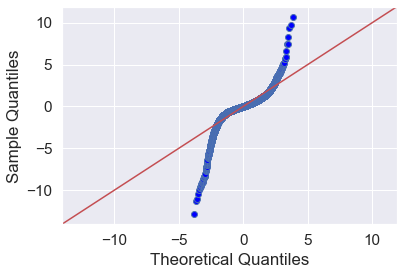

In [178]:
fig = sm.graphics.qqplot(train_residuals_final, dist=stats.norm, line='45', fit=True)

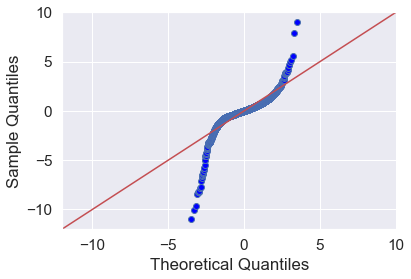

In [179]:
fig = sm.graphics.qqplot(test_residuals_final, dist=stats.norm, line='45', fit=True)

# Evaluation
>Evaluate how well your work solves the stated business problem.
>Questions to consider:
>How do you interpret the results?
>How well does your model fit your data? How much better is this than your baseline model?
>How confident are you that your results would generalize beyond the data you have?
>How confident are you that this model would benefit the business if put into use?

# Conclusions
>Provide your conclusions about the work you've done, including any limitations or next steps.
>Questions to consider:
>What would you recommend the business do as a result of this work?
>What are some reasons why your analysis might not fully solve the business problem?
>What else could you do in the future to improve this project?
